# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

%matplotlib inline

In [2]:
#read twitter-archive-ehanced.csv in dataframe
df_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
df_archive.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#reading data from webpage
folder_name = "img_pred"

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [6]:
with open(os.path.join(folder_name, url.split("/")[-1]), mode = "wb") as file:
         file.write(response.content)

In [7]:
df_img_pred = pd.read_csv("img_pred/image-predictions.tsv", sep="\t")
df_img_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [8]:
df_img_pred.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
#due to failure to get twitter developer pass
#data is read from the provided file "tweet-json.txt"
import json
df_list = []

with open("tweet-json.txt", encoding="utf-8") as file:
    for line in file:
        data = json.loads(line)
        tweet_id = data["id"]
        retweet_count = data["retweet_count"]
        favorite_count = data["favorite_count"]
        
        df_list.append({"tweet_id":tweet_id,
                       "retweet_count":retweet_count,
                       "favorite_count":favorite_count})

In [10]:
#convert dictionary in dataframe
df_json = pd.DataFrame(df_list, columns=["tweet_id", "retweet_count",
                                         "favorite_count"])

In [11]:
df_json.shape

(2354, 3)

In [12]:
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [13]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1692,681302363064414209,NaN,NaN,2015-12-28 02:35:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuck. He's a neat dog. Very flexible....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681302363...,3,10,Chuck,None,None,None,None
319,834477809192075265,NaN,NaN,2017-02-22 18:59:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Leo. He was a skater pu...,8.295020e+17,4.196984e+09,2017-02-09 01:27:41 +0000,https://twitter.com/dog_rates/status/829501995...,12,10,Leo,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
1759,678740035362037760,NaN,NaN,2015-12-21 00:53:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tango. He's a large dog. Doesn't care muc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678740035...,6,10,Tango,None,None,None,None
2097,670733412878163972,NaN,NaN,2015-11-28 22:38:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a great listener. Low main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670733412...,8,10,Jerry,None,None,None,None


In [14]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df_archive.duplicated().sum()

0

In [16]:
len(df_archive[~df_archive.retweeted_status_id.isnull()])

181

In [17]:
df_img_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
200,669680153564442624,https://pbs.twimg.com/media/CUsuijgXAAE4pdi.jpg,1,dalmatian,0.141257,True,borzoi,0.137744,True,Labrador_retriever,0.103792,True
1122,726935089318363137,https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg,2,teddy,0.821615,False,toy_poodle,0.083749,True,Lakeland_terrier,0.033318,True
451,674743008475090944,https://pbs.twimg.com/media/CV0rL7RWEAAbhqm.jpg,1,Bernese_mountain_dog,0.583054,True,Shetland_sheepdog,0.065990,True,Greater_Swiss_Mountain_dog,0.065236,True
1094,719991154352222208,https://pbs.twimg.com/media/Cf3sH62VAAA-LiP.jpg,2,golden_retriever,0.605304,True,cocker_spaniel,0.130948,True,Labrador_retriever,0.094692,True
309,671538301157904385,https://pbs.twimg.com/media/CVHIhi2WsAEgdKk.jpg,1,park_bench,0.194211,False,water_bottle,0.071870,False,beacon,0.053433,False


In [18]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_img_pred.duplicated().sum()

0

In [20]:
df_json.sample(5)

,tweet_id,retweet_count,favorite_count
2207,668623201287675904,851,1551
646,793135492858580992,2893,7214
2151,669661792646373376,482,860
2231,668204964695683073,206,586
999,747933425676525569,2894,7310


In [21]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [22]:
df_json.duplicated().sum()

0

In [23]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Quality issues
`Twitter archive enhanced`

1. Presence of retweets in the dataset

3. Presence of replies in the dataset

4. Null values in retweet and reply columns after dropping rows. 

5. tweet_id column datatype is int64 instead of string.

6. After creating dog_stage columns, datatype should be categorical.

7. Empty dog_stage values not null.

8. Rating denominators less than 10.

9. Rating numerators less than 10

10. Correct the merged dog_stage value names.

`tweet image prediction`

1. Tweet id in int64 

`tweet json`

1. Tweet id in int64.

### Tidiness issues
1. Dog stage in four columns instead of one.

2. The three tables should fuse to one table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
df_1 = df_archive.copy()
df_2 = df_img_pred.copy()
df_3 = df_json.copy()

### Issue #1: Dog stage in four columns instead of one.

#### Define: Merge the doggo, floofer, pupper and puppo column to dog_stage column. Then, drop the columns

#### Code

In [26]:
#replace "None" with "" in each column
for i in ["doggo", "floofer", "pupper", "puppo"]:
    df_1[i].replace("None", "", inplace = True)
#combine the four string columns together to create one column called dog_stage
df_1["dog_stage"] = df_1["doggo"] + df_1[
 "floofer"]+ df_1["pupper"] + df_1["puppo"]
df_1.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [27]:
#drop the "doggo", "pupper", "puppo", "floofer" columns
df_1 = df_1.drop(["doggo", "pupper", "puppo", "floofer"], axis=1)

#### Test

In [28]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2175,669214165781868544,NaN,NaN,2015-11-24 18:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jaspers. He is a northeastern Gillette...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669214165...,10,10,Jaspers,
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,pupper
2097,670733412878163972,NaN,NaN,2015-11-28 22:38:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a great listener. Low main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670733412...,8,10,Jerry,
1564,688116655151435777,NaN,NaN,2016-01-15 21:52:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please send dogs. I'm tired of seeing other st...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688116655...,10,10,None,
1623,684902183876321280,NaN,NaN,2016-01-07 00:59:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Perry. He's an Augustus Gloopster. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684902183...,11,10,Perry,


### Issue #2: Presence of Retweets in dataset.

#### Define: Drop rows with retweets.

#### Code

In [29]:
#drop tweets with retweets
df_1 = df_1[df_1["retweeted_status_id"].isnull()]

#### Test

In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     2175 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 254.9+ KB


### Issue #3: Presence of replies in dataset

#### Define: Drop row with replies

#### Code

In [31]:
#drop tweets with replies
df_1 = df_1[df_1["in_reply_to_status_id"].isnull()]

#### Test

In [32]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
dog_stage                     2097 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 245.7+ KB


### Issue #4: Retweet and in_reply columns are empty

#### Define: Drop retweet and in_reply columns

#### Code

In [33]:
#drop all retweet and in_reply columns
cols = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id",
       "retweeted_status_user_id", "retweeted_status_timestamp"]
df_1 = df_1.drop(cols, axis=1)

#### Test

In [34]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


### Issue #5: tweet_id datatype is wrong in `df_1`.

#### Define: change datatype of tweet_id from int64 to str

#### Code

In [35]:
#change datatype to string
df_1.tweet_id = df_1.tweet_id.astype(str)

#### Test

In [36]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
dtypes: int64(2), object(7)
memory usage: 163.8+ KB


### Issue #6: dog_stage datatype should be in category

#### Define: change dog_stage datatype to category

#### Code

In [37]:
#change the datatype to categorical
df_1.dog_stage = df_1.dog_stage.astype("category")

#### Test

In [38]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null category
dtypes: category(1), int64(2), object(6)
memory usage: 149.9+ KB


### Issue #7: tweet_id in `df_2` in int64.

#### Define: Convert the tweet_id from int64 to object

#### Code

In [39]:
#the tweet_id datatype should be a string
df_2.tweet_id = df_2.tweet_id.astype("str")

#### Test

In [40]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #8: tweet_id in `df_3` in int64.

#### Define: Convert datatype of tweet_id to object.

#### Code

In [41]:
df_3.tweet_id = df_3.tweet_id.astype("str")

#### Test

In [42]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #9: Empty entries in dog_stage column in`df_1` represented as blanks

#### Define: Replace the blank entries in dog_stage column with NaN

#### Code

In [43]:
#all blank values for the dog_stage should be Null
df_1.dog_stage = df_1.dog_stage.replace("", np.nan)

#### Test

In [44]:
df_1.dog_stage.sample(5)

1429    pupper
999        NaN
2278       NaN
1526       NaN
1456       NaN
Name: dog_stage, dtype: category
Categories (8, object): [, doggo, doggofloofer, doggopupper, doggopuppo, floofer, pupper, puppo]

### Issue #10: Rating denominator less than 10

#### Define: Replace all denominators less than 10 with 10.

#### Code

In [45]:
#all denominators less than 10 to be replaced by 10
mask = df_1.rating_denominator < 10
df_1.rating_denominator = df_1.rating_denominator.replace(df_1[mask].rating_denominator, 10)

#### Test

In [46]:
df_1.rating_denominator.value_counts()

10     2082
50        3
11        2
80        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
Name: rating_denominator, dtype: int64

### Issue #11: Rating Numerators less than 10

#### Define: Drop rows with ratings less than 10

#### Code

In [47]:
#drop rows with rating_numerator value less than 10
df_1 = df_1[df_1.rating_numerator >= 10]

#### Test

In [48]:
df_1.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
14       38
50        1
24        1
26        1
27        1
44        1
45        1
1776      1
420       1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
60        1
Name: rating_numerator, dtype: int64

### Issue #12: Correct value names in dog_stage column

#### Define: Rename incomprehensible value names in dog_stage column with more readable names. Change "doggopupper" to "doggo, pupper"

#### Code

In [49]:
df_1.dog_stage.value_counts()

pupper          182
doggo            69
puppo            22
floofer           9
doggopupper       8
doggopuppo        1
doggofloofer      1
                  0
Name: dog_stage, dtype: int64

In [50]:
#create a dictionary to contain the names that will be replaced
stage_names = {
    "doggopupper": "doggo, pupper",
    "doggopuppo" : "doggo, puppo",
    "doggofloofer": "doggo, floofer"
}

In [51]:
#define function to effect the change of names for the dog_stage values
def correct_stage(tweet):
    if tweet["dog_stage"] in stage_names.keys():
        stage = stage_names[tweet["dog_stage"]]
        return stage
    else:
        return tweet["dog_stage"]

In [52]:
#apply the function to the dataset
df_1["dog_stage"] = df_1.apply(correct_stage, axis=1)

#### Test

In [53]:
df_1.dog_stage.value_counts()

pupper            182
doggo              69
puppo              22
floofer             9
doggo, pupper       8
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Issue #13: Only one table is required.

#### Define: Merge all table to one on tweet_id

#### Code

In [54]:
#merge all three tables on "tweet_id"
df_final = pd.merge(pd.merge(df_1, df_2, on="tweet_id"), df_3, on="tweet_id")

#### Test

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 0 to 1558
Data columns (total 22 columns):
tweet_id              1559 non-null object
timestamp             1559 non-null object
source                1559 non-null object
text                  1559 non-null object
expanded_urls         1559 non-null object
rating_numerator      1559 non-null int64
rating_denominator    1559 non-null int64
name                  1559 non-null object
dog_stage             259 non-null object
jpg_url               1559 non-null object
img_num               1559 non-null int64
p1                    1559 non-null object
p1_conf               1559 non-null float64
p1_dog                1559 non-null bool
p2                    1559 non-null object
p2_conf               1559 non-null float64
p2_dog                1559 non-null bool
p3                    1559 non-null object
p3_conf               1559 non-null float64
p3_dog                1559 non-null bool
retweet_count         1559 non-null int6

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
#save dataset to csv
df_final.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [57]:
#load the master dataset
df = pd.read_csv("twitter_archive_master.csv")

In [58]:
#review the numerator to see which rating was most frequent
df.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
14       33
50        1
24        1
26        1
27        1
44        1
45        1
1776      1
420       1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
60        1
Name: rating_numerator, dtype: int64

In [59]:
#review predictions to obtain the most tweeted dog
df.p1.value_counts()

golden_retriever                  129
Labrador_retriever                 86
Pembroke                           83
Chihuahua                          62
chow                               41
pug                                40
Samoyed                            39
Pomeranian                         38
toy_poodle                         32
malamute                           26
cocker_spaniel                     25
French_bulldog                     20
Chesapeake_Bay_retriever           20
Siberian_husky                     19
Eskimo_dog                         18
miniature_pinscher                 17
German_shepherd                    17
Staffordshire_bullterrier          16
Cardigan                           16
teddy                              15
Rottweiler                         14
Shih-Tzu                           14
web_site                           14
beagle                             13
kuvasz                             13
Shetland_sheepdog                  13
Great_Pyrene

In [60]:
#what dog stage is most frequent
df.dog_stage.value_counts()

pupper            162
doggo              60
puppo              21
doggo, pupper       7
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [61]:
#Number of null values in dog_stage
df.dog_stage.isnull().sum()

1300

### Insights:
1. Most dogs were rated between 10 to 14.

2. Majority of the dogs posted were golden retrievers

3. Majority of the dogs had their stages ommitted. However, of those with stages provided, puppers had the highest number.

### Visualization

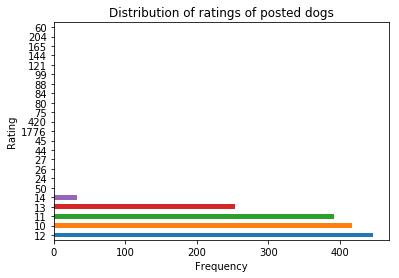

In [62]:
#Plot the ratings of the dogs and compare their frequency
df.rating_numerator.value_counts().plot(kind="barh")
plt.xlabel("Frequency")
plt.ylabel("Rating")
plt.title("Distribution of ratings of posted dogs");